In [1]:
import pandas as pd
import geopandas as gpd


In [2]:
df = pd.read_csv('./poligonos/radios_censales/radios_censales.csv', encoding = 'utf-8', index_col=0)
df.head()

,HOGARES,ID_TOPONIMIA,LINK,MUJERES,OBJECTID,POBLACION_TOTAL,PROVINCIA,Shape__Area,Shape__Length,VARONES,VIVIENDAS,VIVIENDAS_PARTICULARES
0,286,336646,900770404,576,1,1175,TUCUMÁN,5.286449e+06,20415.636295,599,275,231
1,287,336643,900770202,582,2,1182,TUCUMÁN,9.614077e+06,22637.437132,600,270,243
2,136,336633,900630412,331,3,657,TUCUMÁN,9.690494e+06,19348.303204,326,146,131
3,126,336607,900070403,237,4,492,TUCUMÁN,1.479118e+08,59348.908956,255,147,125
4,457,336356,901050504,999,5,1992,TUCUMÁN,1.504134e+07,19818.595872,993,489,432


## Load and process data.



In [3]:
from IPython.display import display, HTML

pregs_dict = {'names': ['PERSONA-CONDACT', 'PERSONA-P01', 'PERSONA-P02', 'PERSONA-P05', 
                        'PERSONA-P07', 'PERSONA-P08', 'PERSONA-P09', 'PERSONA-P10', 'PERSONA-P12',
                        'HOGAR-ALGUNBI', 'HOGAR-H05', 'HOGAR-H06', 'HOGAR-H07', 'HOGAR-H08', 'HOGAR-H09', 
                        'HOGAR-H10', 'HOGAR-H11', 'HOGAR-H12', 'HOGAR-H13', 'HOGAR-H14', 
                        'HOGAR-H19A', 'HOGAR-H19B', 'HOGAR-H19C', 'HOGAR-H19D',
                        'HOGAR-INDHAC', 'HOGAR-PROP', 'HOGAR-TOTPERS', 
                       'VIVIENDA-INCALCONS', 'VIVIENDA-INCALSERV', 'VIVIENDA-INMAT', 'VIVIENDA-TIPVV', 'VIVIENDA-TOTHOG',
                       'VIVIENDA-URP', 'VIVIENDA-V00', 'VIVIENDA-V01', 'VIVIENDA-V02'],
              'prefix': ['Actividad ', 'Relacion con jefe ', 'Sexo ', 'Nacionalidad ', 
                         'Sabe leer ', 'Asist escuela ', 'Nivel educativo ', 'Terminado ', 'Usa PC ',
                        'NBI', 'Pisos ', 'Cubierta techos ', 'Cielorraso ', 'Salida agua ', 'Red agua ',
                        'Tiene baño ', 'Baño con cadena ', 'Desague baño ', 'Baño uso exclusivo ', 'Combustible cocina ',
                        'Heladera ', 'Computadora ', 'Celular ', 'Tel linea ', 'Hacinamiento ', 'Tenencia propiedad ', 'Personas en hogar ',
                        'Calidad de construccion ', 'Calidad de servicios ', 'Calidad de materiales ', 'Tipo de vivienda ', 'Hogares en vivienda ',
                        'Urbana o Rural ', 'Tipo de vivienda colectiva ', 'Tipo de vivienda particular ', 'Ocupacion ',
                        ]}


In [4]:
radios_gdf = gpd.GeoDataFrame.from_file('./poligonos/radios_censales/radios_w_geometry.shp').rename(columns = {'LINK': 'radio'})
radios_gdf['link'] = radios_gdf['radio'].str[:5]
radios_gdf['codprov'] = radios_gdf['radio'].str[:2]
deptos_gdf = gpd.GeoDataFrame.from_file('./poligonos/departamentos/pxdptodatosok.shp', driver = 'ESRI Shapefile')
provs_gdf = gpd.GeoDataFrame.from_file('./poligonos/provincias/provincias.shp').rename(columns = {'IN1': 'codprov'})

In [5]:
info_list = []
info_dptos_list = []
info_provs_list = []

for name in ['HOGAR-ALGUNBI', 'HOGAR-H05', 'HOGAR-H06', 'HOGAR-H07', 'HOGAR-H08', 'HOGAR-H09', 
                        'HOGAR-H10', 'HOGAR-H11', 'HOGAR-H12', 'HOGAR-H13', 'HOGAR-H14', 
                        'HOGAR-H19A', 'HOGAR-H19B', 'HOGAR-H19C', 'HOGAR-H19D']:
    print(name+".csv")
    df_pregunta = pd.read_csv("./../Datos_censo/Preguntas/merged/"+name+".csv", encoding = 'utf-8')
    df_pregunta['radio'] = df_pregunta['radio'].astype(str).str.zfill(9)
#     df_pregunta.columns = [s.replace(' ', '_') for s in df_pregunta.columns]
    
    info = df_pregunta.iloc[:, 5:].set_index('radio')
    info = info.add_prefix(name[-3:]+'_')
    
    info_dptos = info.reset_index().merge(radios_gdf[['radio','link']]).groupby('link').sum()
    info_provs = info.reset_index().merge(radios_gdf[['radio','codprov']]).groupby('codprov').sum()
    
    info = pd.concat([info, 100*info.div(info.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    info_dptos = pd.concat([info_dptos, 100*info_dptos.div(info_dptos.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    info_provs = pd.concat([info_provs, 100*info_provs.div(info_provs.iloc[:, -1], axis = 0).add_prefix('%_').round(3)], axis = 1)
    
    display(info.head(3))
    info_list += [info]
    info_dptos_list += [info_dptos]
    info_provs_list += [info_provs]
    
info_df = pd.concat(info_list, axis = 1)
info_dptos_df = pd.concat(info_dptos_list, axis = 1)
info_provs_df = pd.concat(info_provs_list, axis = 1)

HOGAR-ALGUNBI.csv


,NBI_0 Hogares sin NBI,NBI_1 Hogares con NBI,NBI_TOTAL,%_NBI_0 Hogares sin NBI,%_NBI_1 Hogares con NBI,%_NBI_TOTAL
radio,,,,,,
900770404,250.0,36.0,286.0,87.4,12.6,100.0
900770202,222.0,65.0,287.0,77.4,22.6,100.0
900630412,104.0,32.0,136.0,76.5,23.5,100.0


HOGAR-H05.csv


,"H05_1 Ceramica, baldosa, mosaico, marmol, madera o alfombrado",H05_2 Cemento o ladrillo fijo,H05_3 Tierra o ladrillo suelto,H05_4 Otro,H05_TOTAL,"%_H05_1 Ceramica, baldosa, mosaico, marmol, madera o alfombrado",%_H05_2 Cemento o ladrillo fijo,%_H05_3 Tierra o ladrillo suelto,%_H05_4 Otro,%_H05_TOTAL
radio,,,,,,,,,,
900770404,115.0,152.0,19.0,0.0,286.0,40.2,53.1,6.6,0.0,100.0
900770202,103.0,138.0,45.0,1.0,287.0,35.9,48.1,15.7,0.3,100.0
900630412,39.0,82.0,14.0,1.0,136.0,28.7,60.3,10.3,0.7,100.0


HOGAR-H06.csv


,H06_1 Cubierta asfaltica o membrana,H06_2 Baldosa o losa (sin cubierta),H06_3 Pizarra o teja,H06_4 Chapa de metal (sin cubierta),H06_5 Chapa fibrocemento o plastico,H06_6 Chapa de carton,"H06_7 Cana, palma, tabla o paja con o sin barro",H06_8 Otro,H06_TOTAL,%_H06_1 Cubierta asfaltica o membrana,%_H06_2 Baldosa o losa (sin cubierta),%_H06_3 Pizarra o teja,%_H06_4 Chapa de metal (sin cubierta),%_H06_5 Chapa fibrocemento o plastico,%_H06_6 Chapa de carton,"%_H06_7 Cana, palma, tabla o paja con o sin barro",%_H06_8 Otro,%_H06_TOTAL
radio,,,,,,,,,,,,,,,,,,
900770404,23.0,2.0,1.0,247.0,8.0,1.0,3.0,1.0,286.0,8.0,0.7,0.3,86.4,2.8,0.3,1.0,0.3,100.0
900770202,2.0,10.0,59.0,198.0,3.0,7.0,8.0,0.0,287.0,0.7,3.5,20.6,69.0,1.0,2.4,2.8,0.0,100.0
900630412,0.0,2.0,3.0,126.0,3.0,1.0,0.0,1.0,136.0,0.0,1.5,2.2,92.6,2.2,0.7,0.0,0.7,100.0


HOGAR-H07.csv


,H07_1 Si,H07_2 No,H07_TOTAL,%_H07_1 Si,%_H07_2 No,%_H07_TOTAL
radio,,,,,,
900770404,172.0,114.0,286.0,60.1,39.9,100.0
900770202,102.0,185.0,287.0,35.5,64.5,100.0
900630412,30.0,106.0,136.0,22.1,77.9,100.0


HOGAR-H08.csv


,H08_1 Por caneria dentro de la vivienda,H08_2 Fuera de la vivienda pero dentro del terreno,H08_3 Fuera del terreno,H08_TOTAL,%_H08_1 Por caneria dentro de la vivienda,%_H08_2 Fuera de la vivienda pero dentro del terreno,%_H08_3 Fuera del terreno,%_H08_TOTAL
radio,,,,,,,,
900770404,238.0,43.0,5.0,286.0,83.2,15.0,1.7,100.0
900770202,164.0,114.0,9.0,287.0,57.1,39.7,3.1,100.0
900630412,99.0,33.0,4.0,136.0,72.8,24.3,2.9,100.0


HOGAR-H09.csv


,H09_1 Red publica,H09_2 Perforacion con bomba a motor,H09_3 Perforacion con bomba manual,H09_4 Pozo,H09_5 Transporte por cisterna,"H09_6 Agua de lluvia, rio, canal, arroyo o acequia",H09_TOTAL,%_H09_1 Red publica,%_H09_2 Perforacion con bomba a motor,%_H09_3 Perforacion con bomba manual,%_H09_4 Pozo,%_H09_5 Transporte por cisterna,"%_H09_6 Agua de lluvia, rio, canal, arroyo o acequia",%_H09_TOTAL
radio,,,,,,,,,,,,,,
900770404,274.0,7.0,1.0,3.0,0.0,1.0,286.0,95.8,2.4,0.3,1.0,0.0,0.3,100.0
900770202,255.0,19.0,8.0,2.0,2.0,1.0,287.0,88.9,6.6,2.8,0.7,0.7,0.3,100.0
900630412,136.0,0.0,0.0,0.0,0.0,0.0,136.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0


HOGAR-H10.csv


,H10_1 Si,H10_2 No,H10_TOTAL,%_H10_1 Si,%_H10_2 No,%_H10_TOTAL
radio,,,,,,
900770404,268.0,18.0,286.0,93.7,6.3,100.0
900770202,267.0,20.0,287.0,93.0,7.0,100.0
900630412,124.0,12.0,136.0,91.2,8.8,100.0


HOGAR-H11.csv


,H11_1 Si,H11_2 No,H11_TOTAL,%_H11_1 Si,%_H11_2 No,%_H11_TOTAL
radio,,,,,,
900770404,242.0,26.0,268.0,90.3,9.7,100.0
900770202,198.0,69.0,267.0,74.2,25.8,100.0
900630412,86.0,38.0,124.0,69.4,30.6,100.0


HOGAR-H12.csv


,H12_1 A red publica (cloaca),H12_2 A camara septica y pozo ciego,H12_3 Solo a pozo ciego,"H12_4 A hoyo, excavacion en la tierra, etc.",H12_TOTAL,%_H12_1 A red publica (cloaca),%_H12_2 A camara septica y pozo ciego,%_H12_3 Solo a pozo ciego,"%_H12_4 A hoyo, excavacion en la tierra, etc.",%_H12_TOTAL
radio,,,,,,,,,,
900770404,14.0,176.0,75.0,3.0,268.0,5.2,65.7,28.0,1.1,100.0
900770202,90.0,56.0,109.0,12.0,267.0,33.7,21.0,40.8,4.5,100.0
900630412,0.0,58.0,61.0,5.0,124.0,0.0,46.8,49.2,4.0,100.0


HOGAR-H13.csv


,H13_1 Usado solo por este hogar,H13_2 Compartido con otros hogares,H13_TOTAL,%_H13_1 Usado solo por este hogar,%_H13_2 Compartido con otros hogares,%_H13_TOTAL
radio,,,,,,
900770404,257.0,11.0,268.0,95.9,4.1,100.0
900770202,245.0,22.0,267.0,91.8,8.2,100.0
900630412,123.0,1.0,124.0,99.2,0.8,100.0


HOGAR-H14.csv


,H14_1 Gas de red,H14_2 Gas a granel (zeppelin),H14_3 Gas en tubo,H14_4 Gas en garrafa,H14_5 Electricidad,H14_6 Lena o carbon,H14_7 Otro,H14_TOTAL,%_H14_1 Gas de red,%_H14_2 Gas a granel (zeppelin),%_H14_3 Gas en tubo,%_H14_4 Gas en garrafa,%_H14_5 Electricidad,%_H14_6 Lena o carbon,%_H14_7 Otro,%_H14_TOTAL
radio,,,,,,,,,,,,,,,,
900770404,2.0,0.0,2.0,277.0,0.0,4.0,1.0,286.0,0.7,0.0,0.7,96.9,0.0,1.4,0.3,100.0
900770202,59.0,0.0,0.0,208.0,0.0,20.0,0.0,287.0,20.6,0.0,0.0,72.5,0.0,7.0,0.0,100.0
900630412,0.0,0.0,4.0,124.0,0.0,7.0,1.0,136.0,0.0,0.0,2.9,91.2,0.0,5.1,0.7,100.0


HOGAR-H19A.csv


,19A_1 Si,19A_2 No,19A_TOTAL,%_19A_1 Si,%_19A_2 No,%_19A_TOTAL
radio,,,,,,
900770404,248.0,38.0,286.0,86.7,13.3,100.0
900770202,245.0,42.0,287.0,85.4,14.6,100.0
900630412,108.0,28.0,136.0,79.4,20.6,100.0


HOGAR-H19B.csv


,19B_1 Si,19B_2 No,19B_TOTAL,%_19B_1 Si,%_19B_2 No,%_19B_TOTAL
radio,,,,,,
900770404,27.0,259.0,286.0,9.4,90.6,100.0
900770202,60.0,227.0,287.0,20.9,79.1,100.0
900630412,10.0,126.0,136.0,7.4,92.6,100.0


HOGAR-H19C.csv


,19C_1 Si,19C_2 No,19C_TOTAL,%_19C_1 Si,%_19C_2 No,%_19C_TOTAL
radio,,,,,,
900770404,239.0,47.0,286.0,83.6,16.4,100.0
900770202,247.0,40.0,287.0,86.1,13.9,100.0
900630412,108.0,28.0,136.0,79.4,20.6,100.0


HOGAR-H19D.csv


,19D_1 Si,19D_2 No,19D_TOTAL,%_19D_1 Si,%_19D_2 No,%_19D_TOTAL
radio,,,,,,
900770404,2.0,284.0,286.0,0.7,99.3,100.0
900770202,20.0,267.0,287.0,7.0,93.0,100.0
900630412,3.0,133.0,136.0,2.2,97.8,100.0


## Merge geo data

In [6]:
radios_info_gdf = gpd.GeoDataFrame(info_df.reset_index().merge(radios_gdf[['radio', 'geometry']]))
deptos_info_gdf = gpd.GeoDataFrame(info_dptos_df.reset_index().merge(deptos_gdf[['link', 'departamen', 'provincia', 'geometry']]))
provs_info_gdf = gpd.GeoDataFrame(info_provs_df.reset_index().merge(provs_gdf[['codprov', 'NAM', 'geometry']]))

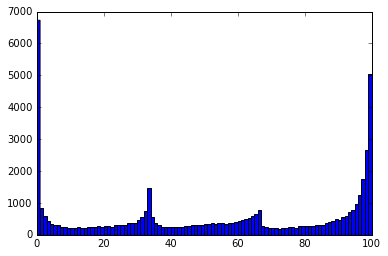

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.hist(radios_info_gdf['%_H14_1 Gas de red'].dropna(), 100)
# plt.show()

# plt.hist(radios_info_gdf['%_H12_1 A red publica (cloaca)'].dropna(), 100)
# plt.show()

# plt.hist(radios_info_gdf['%_NBI_0 Hogares sin NBI'].dropna(), 100)
# plt.show()

# plt.hist(radios_info_gdf['%_H09_1 Red publica'].dropna(), 100)
# plt.show()

plt.hist((radios_info_gdf['%_H14_1 Gas de red'] + radios_info_gdf['%_H09_1 Red publica'] + radios_info_gdf['%_H12_1 A red publica (cloaca)']).dropna()/3., 100)
plt.show()

In [9]:
# #Indice educacion (se usa para pintar mapa)

# def indice_educ(gdf):
#     indice_educ = gdf['%_P09_2 Primario'] + 2*gdf['%_P09_4 Secundario'] + 3*gdf['%_P09_6 Superior no universitario']+ \
#     +4*gdf['%_P09_7 Universitario'] + 5*gdf['%_P09_8 Post universitario'] - gdf['%_P07_2 No']
#     return indice_educ

# radios_info_gdf['indice_educ'] = indice_educ(radios_info_gdf)
# deptos_info_gdf['indice_educ'] = indice_educ(deptos_info_gdf)
# provs_info_gdf['indice_educ'] = indice_educ(provs_info_gdf)

In [12]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.hist(provs_info_gdf['indice_educ'].dropna(), 8)
# plt.show()

### Upload to Mapbox

In [13]:
import os

def save_geojson(gdf, filename = 'test.geojson'):
    try:    # Delete if geojson exists, cause overwriting is not supported
        os.remove('./geojson/'+filename)
    except OSError:
        pass
    
    gdf.to_file('./geojson/'+filename, driver="GeoJSON")

save_geojson(provs_info_gdf, 'provs_info_hogares.geojson')
save_geojson(deptos_info_gdf, 'deptos_info_hogares.geojson')
save_geojson(radios_info_gdf, 'radios_info_hogares.geojson')


In [18]:
from mapbox import Uploader
import json

def upload_file(data, name, username = 'matuteiglesias', token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'):
    try:    # Clear upload file if exists
        os.remove('./upload_data.geojson')
    except OSError:
        pass
    
    # Dump into file for upload    
    with open('./upload_data.geojson', 'w') as outfile:
        json.dump(data, outfile)

    service = Uploader(access_token=token)
    with open('./upload_data.geojson', 'r') as src:
        # Acquisition of credentials, staging of data, and upload
        # finalization is done by a single method in the Python SDK.
        upload_resp = service.upload(src, username+'.'+name)


def round_geojson(data, r = 5):
    rounded_data = data
    for p in range(len(data['features'])):
        f = data['features'][p]
        shape = np.array(f['geometry']['coordinates']).shape

        for i in range(shape[0]):
            part_i = np.array(f['geometry']['coordinates'])[i]
            for j in range(len(part_i)):
                rounded_data['features'][p]['geometry']['coordinates'][i][j] = np.round(np.array(part_i[j], dtype=float), r).tolist()
    return rounded_data

In [19]:
import os

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

files = os.listdir('./geojson/')
files = ['provs_info_hogares.geojson', 'deptos_info_hogares.geojson', 'radios_info_hogares.geojson']
names = [name.split('.')[0] for name in files]

for i in range(len(files)):
    print names[i]
    data = json.load(open('./geojson/'+files[i]))
    if i == 0: # simplify the provinces coordinates
        data = round_geojson(data, 2)
        
    try:
        upload_file(data, names[i])
    except:
        pass


provs_info_hogares
deptos_info_hogares
radios_info_hogares


In [30]:
pd.set_option('display.max_colwidth', -1)

In [31]:
pd.read_csv('../../Desktop/table_formatting.csv', index_col=0).to_html()

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>n</th>\n      <th>%</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Hogares</th>\n      <td>\' + radios[0].properties[\'NBI_TOTAL\'] + \'</td>\n      <td>\' + radios[0].properties[\'%_NBI_TOTAL\'] + \'</td>\n    </tr>\n    <tr>\n      <th>Necesidades basicas insatisfechas</th>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>Si</th>\n      <td>\' + radios[0].properties[\'NBI_0 Hogares sin NBI\'] + \'</td>\n      <td>\' + radios[0].properties[\'%_NBI_0 Hogares sin NBI\'] + \'</td>\n    </tr>\n    <tr>\n      <th>Material de pisos</th>\n      <td>NaN</td>\n      <td>NaN</td>\n    </tr>\n    <tr>\n      <th>Ceramica, baldosa, marmol, alfombrado</th>\n      <td>\' + radios[0].properties[\'H05_1 Ceramica, baldosa, mosaico, marmol, madera o alfombrado\'] + \'</td>\n      <td>\' + radios[0].properties[\'%_H05_1 Ceramica, baldosa, mosaico, marmol